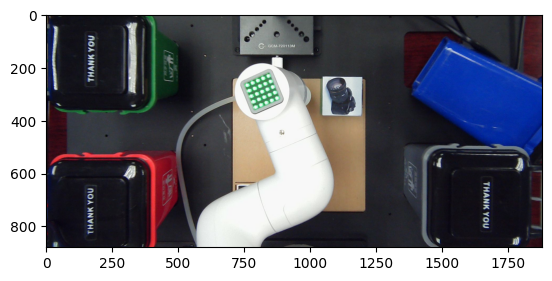

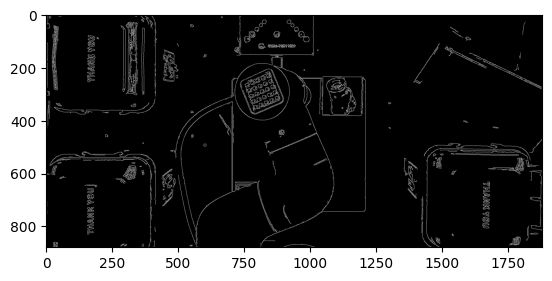

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def detect_screen_objects(image, threshold):

    '''
    输入ndarray格式RGB图像，返回识别到的屏幕图像
    '''

    
    
    # 裁剪边缘部分
    height, width = image.shape[:2]
    cropped_image = image[200:height, 20:width-20]

    plt.figure()
    plt.imshow(cropped_image)    
    
    # 转换为灰度图像
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
    
    # 边缘检测
    edges = cv2.Canny(gray, 50, 150)
    plt.figure()
    plt.imshow(edges, cmap='gray')
    
    # 查找轮廓
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    max_area = 0                    # 最大轮廓面积
    success = 0
    # 遍历轮廓，识别发光有图案屏幕物体
    detected_objects = []
    for contour in contours:
        # 进行多边形逼近，获取近似的轮廓
        approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
        
        # 判断是否为四边形且满足亮度阈值条件
        if len(approx) == 4 and cv2.contourArea(approx) > 500: #and cv2.mean(gray, mask=create_mask(gray,approx))[0] > threshold:
            detected_objects.append(approx)
    
    # 在原图上绘制识别到的物体轮廓
    result = cropped_image.copy()
    cv2.drawContours(result, detected_objects, -1, (0, 255, 0), 5)
    cv2.imshow("Cropped Region", result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # 提取最后一个轮廓的边界框坐标
    # if success == 1:
    #     x, y, w, h = cv2.boundingRect(detected_objects)
        
    #     # 在原图中裁剪出矩形区域
    #     cropped_region = cropped_image[y:y+h, x:x+w]
        
        
    #     # 显示裁剪出的图像区域
    #     plt.figure()
    #     plt.imshow(cropped_region)
    #     return cropped_region
    

def create_mask(gray,contour):
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    return mask

# 设置阈值
threshold = 100

# 调用函数进行发光屏幕物体识别
# 读取输入图片
image_path = "WIN_20231204_15_26_33_Pro.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
detect_screen_objects(image, threshold)

In [1]:
import cv2

image = cv2.imread("input_image.jpg")
    
# 裁剪边缘部分
height, width = image.shape[:2]
cropped_image = image[10:height-10, 10:width-10]


In [4]:
import PIL.Image

# 将 OpenCV 图像转换为 PIL 图像
pil_image = PIL.Image.fromarray(cropped_image)
# 显示 PIL 图像
pil_image.show()

